<img src="CIMA-LOGO.png" alt="CIMA Logo" style="width:25%;">

# Aplicación
El béisbol profesional es un deporte que ha generado un gran interés a
nivel deportivo y económico. La determinación de los salarios de los jugadores
de béisbol es un proceso que involucra varios factores, como el desempeño
en el campo, la experiencia y el rendimiento histórico. En este contexto, el
uso de los árboles de regresión, puede proporcionar información valiosa para
entender y predecir los salarios de los jugadores.
El objetivo de esta aplicación es desarrollar un modelo de árbol de regre-
sión que permita predecir el salario de un jugador de béisbol en función de El objetivo de esta aplicación es desarrollar un modelo de árbol de regresión que permita predecir el salario de un jugador de béisbol en función de dos variables: Years (número de años que ha jugado en las ligas mayores) y Hits (número de hits que hizo en el año anterior).

#### 1) Descripción de los datos
Se usaran la data Hitters de la libreria ISLR en R, el cual contiene 322
observaciones de jugadores de las Grandes Ligas de Béisbol (MLS) de las
temporada 1986 y 1987 y se utiliza en el libro relacionado de G. James et al.
(2013) ’An Introduction to Statistical Learning with applications in R’.
Descripcion de las variables:
* AtBat: Número de veces al bate en 1986
* Hits: Número de hits en 1986
* HmRun: Número de home runs en 1986
* Runs: Número de carreras en 1986
* RBI: Número de carreras impulsadas en 1986
* Walks: Número de bases por bolas en 1986
* Years: Número de años en las ligas mayores
* CAtBat: Número de veces al bate durante su carrera
* CHits: Número de hits durante su carrera
* CHmRun: Número de home runs durante su carrera
* CRuns: Número de carreras durante su carrera
* CRBI: Número de carreras impulsadas durante su carrera
* CWalks: Número de bases por bolas durante su carrera
* League: Un factor con niveles A y N que indica la liga del jugador al
final de 1986
* Division: Un factor con niveles E y W que indica la división del jugador
al final de 1986
* PutOuts: Número de outs realizados en 1986
* Assists: Número de asistencias en 1986
* Errors: Número de errores en 1986
* Salary: Salario anual en 1987 en el día inaugural en miles de dólares
* NewLeague: Un factor con niveles A y N que indica la liga del jugador
al comienzo de 1987

#### 2) Preprocesamiento de Datos
a) Cargamos las librerías, datos y eliminamos los valores N.A

In [1]:
import pandas as pd

# Cargando los datos desde un archivo CSV 
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Hitters.csv'
Hitters = pd.read_csv(url)

# Removiendo valores NA
Hitters = Hitters.dropna()

# Dimensiones del DataFrame
print(Hitters.shape)

(263, 20)


b) Visualizacion de la distribución de la variable Salary

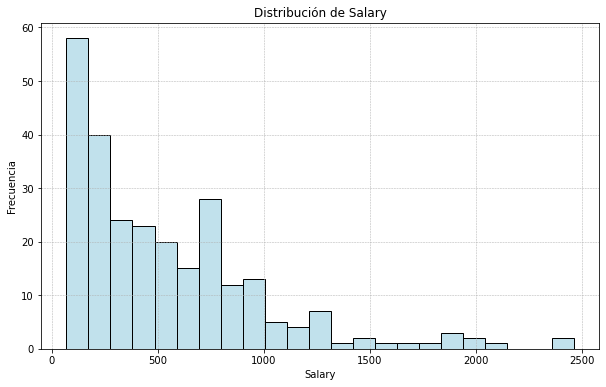

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creando el histograma de la columna Salary
plt.figure(figsize=(10, 6))
sns.histplot(Hitters['Salary'], bins=int((Hitters['Salary'].max() - Hitters['Salary'].min()) / 100), 
             color="lightblue", edgecolor="black")

# Personalizando el gráfico
plt.title("Distribución de Salary")
plt.xlabel("Salary")
plt.ylabel("Frecuencia")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrando el gráfico
plt.show()


Dado que la variable Salary tiene una distribución sesgada a la derecha
(la mayoría de los valores están agrupados hacia la izquierda) hay pocos
jugadores que ganan salarios extremadamente altos, la transformación loga-
rítmica tiende a reducir el sesgo y de ese modo hacer que la distribución se
parezca más a una distribución normal. Por lo cual se añadirá una columna
’log_salary’ que contendrá el logaritmo de los salarios.

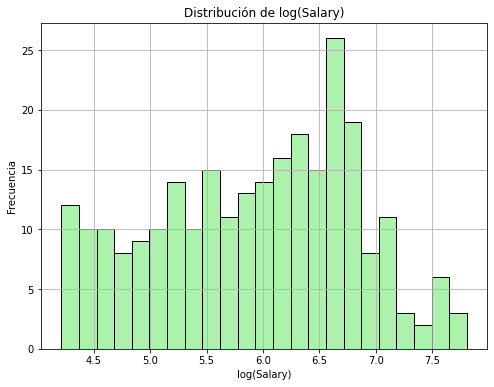

In [3]:
import numpy as np  

# Crear la columna log_Salary
Hitters['log_Salary'] = np.log(Hitters['Salary'])

# Graficar el histograma de log_Salary
plt.figure(figsize=(8, 6))
sns.histplot(Hitters['log_Salary'], bins=int((Hitters['log_Salary'].max() - Hitters['log_Salary'].min()) / 0.15), 
             color="lightgreen", edgecolor="black")

# Personalizar el gráfico
plt.title("Distribución de log(Salary)")
plt.xlabel("log(Salary)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


Comparación de densidades:

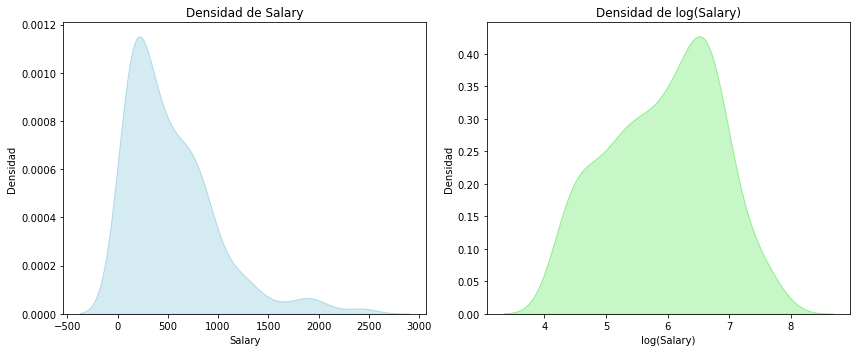

In [4]:
# Gráfico de densidad de Salary
plt.figure(figsize=(12, 5))  # Tamaño de la figura

# Gráfico densidad1 (Salary)
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sns.kdeplot(Hitters['Salary'], fill=True, color="lightblue", alpha=0.5)
plt.title("Densidad de Salary")
plt.xlabel("Salary")
plt.ylabel("Densidad")

# Gráfico densidad2 (log(Salary))
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
sns.kdeplot(Hitters['log_Salary'], fill=True, color="lightgreen", alpha=0.5)
plt.title("Densidad de log(Salary)")
plt.xlabel("log(Salary)")
plt.ylabel("Densidad")

# Mostrar gráficos
plt.tight_layout()
plt.show()


Gráfico de Matriz de dispersión considerando las variables Years y Hits:

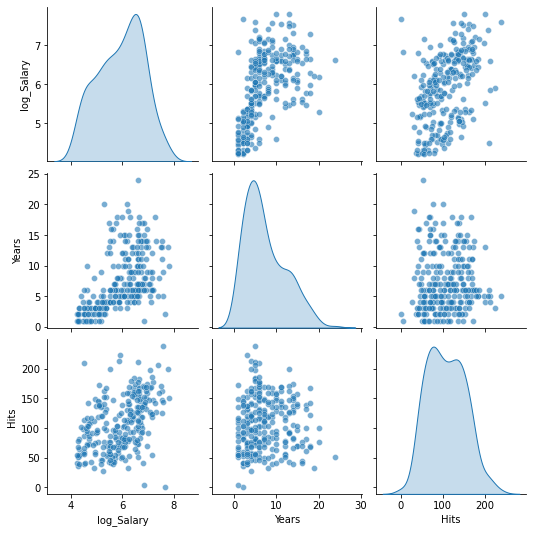

In [5]:
# Seleccionar las variables de interés
data = Hitters[['log_Salary', 'Years', 'Hits']]

# Crear la matriz de dispersión
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha':0.6})
plt.show()

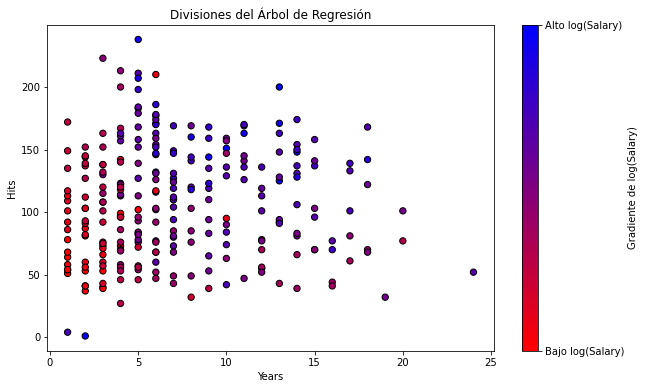

In [8]:
import matplotlib.colors as mcolors

# Crear una paleta de colores en gradiente de rojo a azul
min_color = "red"
max_color = "blue"
color_palette = mcolors.LinearSegmentedColormap.from_list("salary_gradient", [min_color, max_color], N=100)

# Normalizar los valores de log(Salary) para que estén entre 0 y 1
log_salary_normalized = (np.log(Hitters['Salary']) - np.log(Hitters['Salary']).min()) / (np.log(Hitters['Salary']).max() - np.log(Hitters['Salary']).min())

# Creae el gráfico de dispersión con los colores gradientes
plt.figure(figsize=(10, 6))
plt.scatter(Hitters['Years'], Hitters['Hits'], c=log_salary_normalized, cmap=color_palette, s=40, edgecolor='k')
plt.xlabel("Years")
plt.ylabel("Hits")
plt.title("Divisiones del Árbol de Regresión")

# Agregando la leyenda
cbar = plt.colorbar()
cbar.set_label("Gradiente de log(Salary)")
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["Bajo log(Salary)", "Alto log(Salary)"])

plt.show()

En este gráfico de dispersión, se muestra la relación entre las variables "Years"(años) en el eje x y "Hits.en el eje y además, los puntos están colo-
reados de acuerdo al valor de log(Salary), según la leyenda.
A simple vista, no se identifica una relación lineal clara entre las variables
"Years2 "Hits". Los puntos parecen estar dispersos de manera aleatoria, sin
seguir un patrón lineal evidente.
Sin embargo, se pueden observar algunas tendencias generales:
* Los puntos de color azul oscuro, que representan los valores más altos
de log(Salary), tienden a concentrarse en la parte superior derecha del
gráfico, lo que sugiere que los jugadores con más años de experiencia y
más hits tienden a tener salarios más altos.
* Por otro lado, los puntos rojos, que representan los valores más bajos
de log(Salary), tienden a concentrarse en la parte inferior izquierda del
gráfico, lo que indica que los jugadores con menos años de experiencia
y menos hits suelen tener salarios más bajos.

#### 3) Crecimiento del árbol inicial
Se construye un árbol de regresión utilizando la libreria tree de R. Para la
construcción del modelo usamos la función tree la cual utiliza división binaria
recursiva:

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Preparar los datos
X = Hitters[['Years', 'Hits']]
y = Hitters['log_Salary']

# Crear el modelo de árbol de regresión
tree_model = DecisionTreeRegressor(min_samples_split=10, random_state=0)
tree_model.fit(X, y)

# Resumen del modelo
nodos_terminales = sum(tree_model.tree_.children_left == -1)
residuals = y - tree_model.predict(X)
residual_mean_deviance = np.mean(residuals**2)

print("\nResumen del modelo de árbol de regresión:")
print(f"Número de nodos terminales: {nodos_terminales}")
print(f"Desviación media residual: {residual_mean_deviance:.4f}")
print("Distribución de residuos:")
print(f"Min: {residuals.min():.4f}")
print(f"1st Qu.: {np.percentile(residuals, 25):.4f}")
print(f"Median: {np.median(residuals):.4f}")
print(f"3rd Qu.: {np.percentile(residuals, 75):.4f}")
print(f"Max: {residuals.max():.4f}")



Resumen del modelo de árbol de regresión:
Número de nodos terminales: 53
Desviación media residual: 0.1328
Distribución de residuos:
Min: -1.7318
1st Qu.: -0.1883
Median: 0.0000
3rd Qu.: 0.1863
Max: 1.3999


* Hay 53 nodos terminales en el arbol. Estos son los nodos finales en el
árbol donde se realizan las predicciones.
* 0.1328 muestra la desviación media residual, que es una
medida de la calidad del ajuste del modelo. Un valor bajo indica un mejor ajuste del modelo a los datos.

Visualización del árbol de regresión

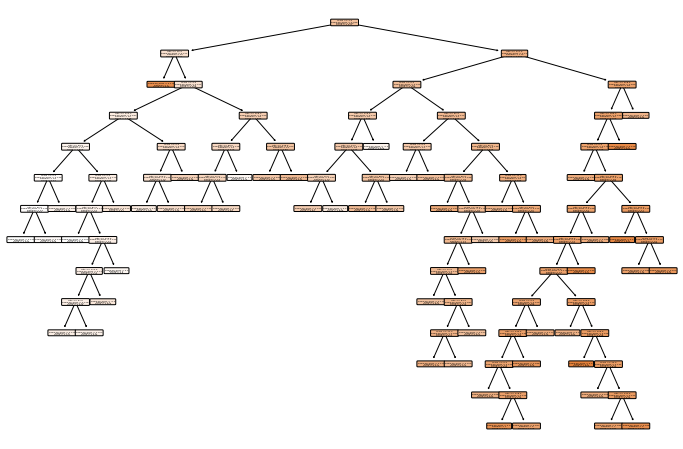

In [11]:
from sklearn.tree import plot_tree

# Visualizar el árbol de regresión
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico
plot_tree(tree_model, feature_names=['Years', 'Hits'], filled=True, rounded=True, precision=3)
plt.show()

En cada nodo interno, se hace la pregunta y sigue la rama izquierda si la
respuesta es “sí” y la rama derecha si la respuesta es “no”.

#### 4) Poda por complejidad de costo
La función prune.tree se utiliza para realizar la poda por complejidad de
costo de un objeto de tree en R. Esto implica la determinación de una secuencia anidada de subárboles del árbol suministrado al cortar recursivamente las
divisiones menos importantes.
El proceso de poda por complejidad de costo busca simplificar el árbol
de regresión al eliminar las divisiones menos significativas, lo que a su vez
reduce la complejidad del modelo final y ayuda a prevenir el sobreajuste
(overfitting). Al podar el árbol de esta manera, se obtiene una versión más
generalizada que sigue siendo efectiva para la predicción de datos nuevos.

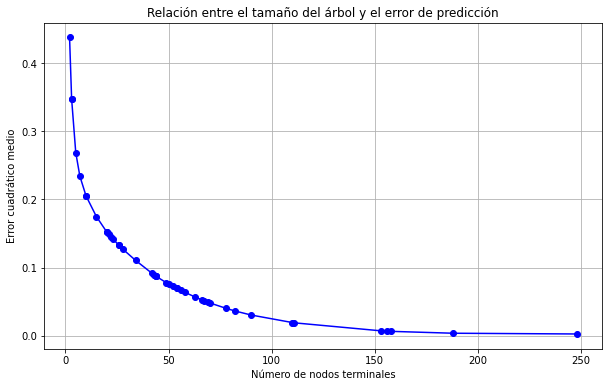

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Obtener los valores de ccp_alpha para realizar la poda
path = tree_model.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas  # Lista de valores alpha para la poda

# Variables para almacenar el número de nodos terminales y el error de predicción
nodos_terminales = []
errores = []

# Crear y evaluar árboles podados para cada valor de ccp_alpha
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X, y)
    nodos_terminales.append(sum(model.tree_.children_left == -1))  # Contar nodos terminales
    y_pred = model.predict(X)
    errores.append(mean_squared_error(y, y_pred))  # Calcular error cuadrático medio

# Graficar la relación entre el número de nodos terminales y el error de predicción
plt.figure(figsize=(10, 6))
plt.plot(nodos_terminales, errores, marker='o', linestyle='-', color='b')
plt.xlabel("Número de nodos terminales")
plt.ylabel("Error cuadrático medio")
plt.title("Relación entre el tamaño del árbol y el error de predicción")
plt.grid()
plt.show()

Este gráfico muestra la relación entre el tamaño del árbol de regresión
(número de nodos terminales) y el error de predicción en el conjunto de
datos. Se genera al ajustar el árbol de regresión y luego aplicar el método
el cost complexity pruning para obtener una secuencia de subárboles más
pequeños.
Se puede observar que el error de predicción disminuye inicialmente a
medida que se agregan más nodos terminales al árbol. Sin embargo, el error de predicción parece estabilizarse o aumentar ligeramente, lo que sugiere que
árboles más grandes no mejoran significativamente el rendimiento.
Por lo tanto, una estrategia común sería seleccionar el subárbol más pe-
queño (menor número de nodos terminales) que tenga un error de predicción
cercano al mínimo observado.

#### 5) Validación cruzada
La validación cruzada es una técnica que se utiliza para mejorar el ren-
dimiento del modelo y prevenir el sobreajuste. La validación cruzada divide
los datos en subconjuntos, entrena el modelo en algunos subconjuntos y lo
valida en los restantes.

* Validación Cruzada: Selección de α mediante validación cruzada K-fold

In [13]:
from sklearn.model_selection import KFold

# Parámetros para la validación cruzada
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=123)
cv_results = []

# Validación cruzada con poda
for train_index, test_index in kf.split(X):
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar el modelo sin poda
    tree_mod_k = DecisionTreeRegressor(min_impurity_decrease=0.002)
    tree_mod_k.fit(X_train, y_train)
    
    # Obtener el camino de poda de complejidad de costo
    path = tree_mod_k.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas

    # Seleccionar el valor óptimo de ccp_alpha y entrenar el modelo podado
    best_alpha = ccp_alphas[np.argmin(path.impurities)]
    tree_mod_podado = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
    tree_mod_podado.fit(X_train, y_train)
    
    # Calcular el error en el conjunto de prueba y almacenar el modelo podado
    y_pred = tree_mod_podado.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    cv_results.append(mse)

# Promedio de los errores cuadráticos medios en los K pliegues
mean_mse = np.mean(cv_results)
print("Promedio del error cuadrático medio en la validación cruzada:", mean_mse)


Promedio del error cuadrático medio en la validación cruzada: 0.505192050057658


Calcular el error promedio para cada valor de α:

In [15]:
# Lista para almacenar el error promedio de cada modelo podado
average_errors = []

# Crear una lista de valores de ccp_alpha y entrenar un modelo por cada valor
for ccp_alpha in ccp_alphas:
    # Crear y entrenar el modelo de árbol con poda
    tree_mod_podado = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree_mod_podado.fit(X_train, y_train)
    
    # Predecir en el conjunto de validación o prueba
    y_pred = tree_mod_podado.predict(X_test)
    
    # Calcular y almacenar el error promedio para este modelo
    error_promedio = mean_squared_error(y_test, y_pred)
    average_errors.append(error_promedio)

# Convertir los errores promedio a un array de numpy para facilitar análisis adicionales
average_errors = np.array(average_errors)

# Mostrar los errores promedio para cada valor de ccp_alpha
print("Errores promedio para cada valor de ccp_alpha:", average_errors)


Errores promedio para cada valor de ccp_alpha: [0.25455861 0.23528765 0.21300741 0.21196461 0.19224672 0.19224672
 0.16779455 0.16714068 0.1665811  0.16616662 0.16213332 0.17834259
 0.17922123 0.17922123 0.17706101 0.17706101 0.18974672 0.18805849
 0.17531532 0.1844135  0.1844135  0.87069273]


Encuentra el α que minimiza el error promedio

In [18]:
# Encontrar el índice del error promedio mínimo
optimal_index = np.argmin(average_errors)

# Obtener el valor óptimo de ccp_alpha correspondiente
optimal_alpha = ccp_alphas[optimal_index]

print(f"El valor óptimo de ccp_alpha que minimiza el error promedio es: {optimal_alpha}")

El valor óptimo de ccp_alpha que minimiza el error promedio es: 0.004024084857403756


Retorna el subárbol óptimo correspondiente al α seleccionado

In [19]:
# Entrenar el modelo de árbol de regresión con el valor óptimo de ccp_alpha
optimal_subtree = DecisionTreeRegressor(random_state=42, ccp_alpha=optimal_alpha)
optimal_subtree.fit(X_train, y_train)

# Opcional: Mostrar el número de hojas en el árbol podado
optimal_size = optimal_subtree.get_n_leaves()
print(f"Tamaño del subárbol óptimo (número de hojas): {optimal_size}")


Tamaño del subárbol óptimo (número de hojas): 21


Visualización del árbol:

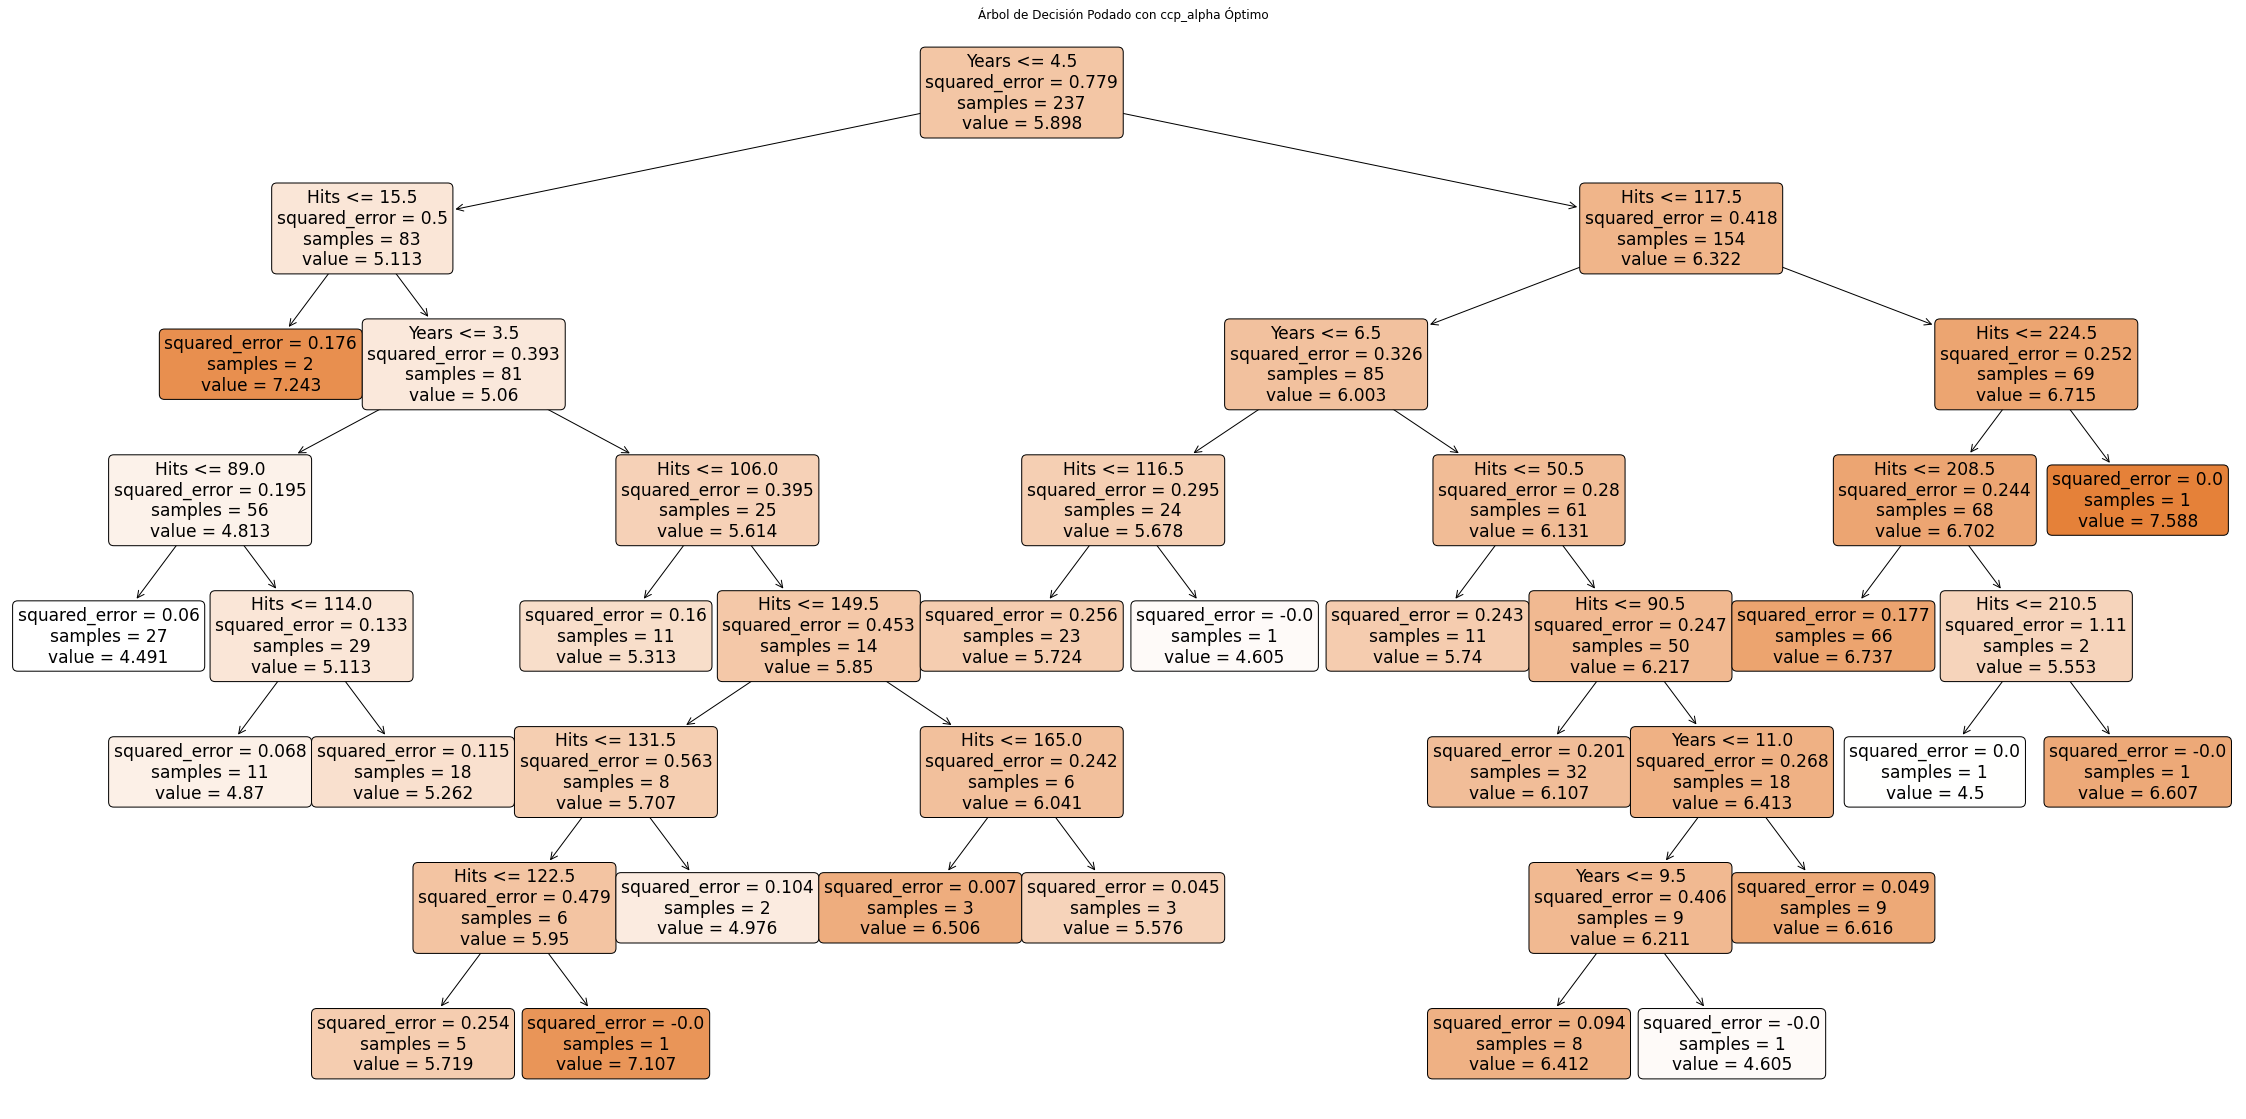

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualización del árbol de decisión podado
plt.figure(figsize=(40, 20))
plot_tree(optimal_subtree, filled=True, feature_names=['Years', 'Hits'], rounded=True, precision=3)
plt.title("Árbol de Decisión Podado con ccp_alpha Óptimo")
plt.show()

También podemos observar las regiones en el gráfico de dispersión:

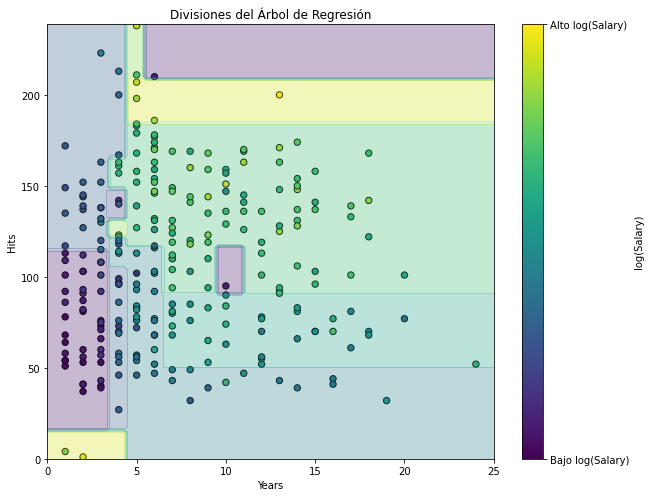

In [22]:
from matplotlib.colors import Normalize

# Crear el modelo de árbol de regresión con el valor óptimo de ccp_alpha
tree_model = DecisionTreeRegressor(random_state=0, ccp_alpha=optimal_alpha)
tree_model.fit(X, y)

# Normalizar los valores de log(Salary) para aplicar gradiente de colores
log_salary_normalized = (y - y.min()) / (y.max() - y.min())
color_palette = plt.get_cmap('viridis')  # Usar la paleta de colores 'viridis'

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    Hitters['Years'], Hitters['Hits'], 
    c=log_salary_normalized, cmap=color_palette, s=40, edgecolor='k'
)
plt.xlabel("Years")
plt.ylabel("Hits")
plt.title("Divisiones del Árbol de Regresión")

# Crear una cuadrícula para las fronteras de decisión
x_min, x_max = X['Years'].min() - 1, X['Years'].max() + 1
y_min, y_max = X['Hits'].min() - 1, X['Hits'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Convertir la cuadrícula en un DataFrame con nombres de columnas
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Years', 'Hits'])

# Predecir valores en cada punto de la cuadrícula para trazar las divisiones del árbol
Z = tree_model.predict(grid)
Z = Z.reshape(xx.shape)

# Dibujar las fronteras de decisión
plt.contourf(xx, yy, Z, alpha=0.3, cmap=color_palette)

# Agregar la leyenda
norm = Normalize(vmin=y.min(), vmax=y.max())
sm = plt.cm.ScalarMappable(cmap=color_palette, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('log(Salary)')
cbar.set_ticks([y.min(), y.max()])
cbar.set_ticklabels(["Bajo log(Salary)", "Alto log(Salary)"])

plt.show()

#### 6) Predicciones

Usar la función predict() para hacer predicciones en el conjunto de prueba.


In [25]:
# Realizar predicciones en el conjunto de prueba
predictions = tree_model.predict(X_test)

# Comparar predicciones con los valores reales
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": predictions
})

# Mostrar los primeros resultados
print(results.head())

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

      Actual  Predicted
20  4.605170   4.604649
43  5.192957   5.315652
62  5.438079   5.315652
65  6.856462   6.727551
76  5.347108   5.315652
Mean Squared Error: 0.11696581601016358


#### 7) Evaluación del modelo
Finalmente, evaluamos el rendimiento del modelo utilizando métricas como el error cuadrático medio (MSE) en un conjunto de datos de prueba.

Mean Squared Error: 6650.850938037735


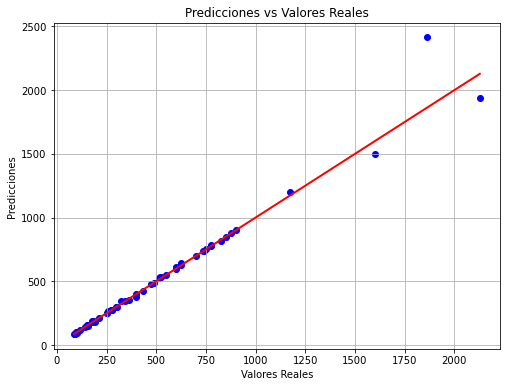

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Convertir las variables categóricas en variables dummy
Hitters = pd.get_dummies(Hitters, drop_first=True)

# Definir las variables independientes (X) y la variable dependiente (y)
X = Hitters.drop('Salary', axis=1)
y = Hitters['Salary']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de regresión
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Predicciones vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.grid(True)
plt.show()



La mayoría de los puntos se encuentran cercanos a la línea roja, lo que
indica que las predicciones son razonablemente precisas en comparación con
los valores reales. Sin embargo, hay pocos puntos que se desvían de la
línea roja, lo que implica que hay ciertos casos donde las predicciones no son
completamente precisas.